# 多策略多股票回測

In [2]:
import os
import sys

In [3]:
# 把我們自己寫的模組的位置，加入到模組搜尋路徑之中，不然會有 import error
module_dir = os.path.join(os.path.dirname(os.getcwd()), 'modules')
if not module_dir in sys.path:
    sys.path.append(module_dir)

In [4]:
import numpy as np
import pandas as pd
from datetime import datetime
from crawler import get_quotes

In [5]:
candidates = ['2330.tw', '2317.tw', '2412.tw', '3406.tw', '3008.tw']

In [6]:
data = {}

for symbol in candidates:
    try:
        data[symbol] = get_quotes(symbol, datetime(2017, 1, 1))
    except Exception as e:
        print("Error accesing symbol:", symbol, "==>", e.args)

## 回測

In [7]:
# 載入計算回測指標的函式
from backtest import indicators

In [8]:
# 用來讀入 all_strategies 裡面的策略
from inspect import getmembers, isfunction
import all_strategies

In [9]:
def apply_strategy(strategy, df):
    return strategy(df)

In [10]:
# 計算各支股票的回測結果
results = []

strategies = [member[1] for member in getmembers(all_strategies) if isfunction(member[1])]

for symbol in data:
    for strategy in strategies:
        try:
            apply_strategy(strategy, data[symbol])
            if np.all(data[symbol]['signals']==0):
                print("Symbol:", symbol, "使用", strategy.__name__, "策略沒有出現買賣訊號。")
                continue
            SharpeRatio, maxdd, maxddd, finalRet = indicators(data[symbol])
            days = (data[symbol].index[-1] - data[symbol].index[0]).days
            results.append((SharpeRatio, maxdd, maxddd, finalRet, days,
                            data[symbol][data[symbol]['signals'] > 0]['signals'].sum(), symbol, strategy.__name__))
        except Exception as e:
            print("Error occurs at symbol:", symbol, "Strategy:", strategy.__name__, "==>", e.args)


results_df = pd.DataFrame(results, columns=['sharpe','MDD','MDDD','Ret','days','#entries','symbol','Strategy'])

## 回測結果

In [11]:
# Sorted by sharpe:
results_df.sort_values('sharpe',ascending=False)

,sharpe,MDD,MDDD,Ret,days,#entries,symbol,Strategy
17,2.65,-0.30,252,5.04,878,11,3406.tw,Breakout
18,2.43,-0.31,216,5.79,878,23,3406.tw,MACD
19,2.12,-0.56,268,8.70,878,50,3406.tw,WMSR
15,1.87,-0.55,268,8.51,878,11,3406.tw,BBand
23,1.57,-0.34,310,2.08,878,18,3008.tw,MACD
8,1.37,-0.12,338,1.41,878,19,2317.tw,MACD
7,1.22,-0.15,338,1.31,878,9,2317.tw,Breakout
21,1.20,-0.35,302,1.58,878,17,3008.tw,BIAS
16,0.98,-0.46,263,1.61,878,20,3406.tw,BIAS
4,0.81,-0.18,350,1.41,878,39,2330.tw,WMSR


In [13]:
# Sorted by MaxDrawDown:
results_df.sort_values('MDD',ascending=False)

,sharpe,MDD,MDDD,Ret,days,#entries,symbol,Strategy
12,0.06,-0.11,682,1.04,878,7,2412.tw,Breakout
2,0.30,-0.12,344,1.08,878,11,2330.tw,Breakout
13,-0.29,-0.12,682,1.00,878,25,2412.tw,MACD
8,1.37,-0.12,338,1.41,878,19,2317.tw,MACD
11,-0.61,-0.14,658,0.94,878,1,2412.tw,BIAS
7,1.22,-0.15,338,1.31,878,9,2317.tw,Breakout
1,0.43,-0.15,79,1.06,878,4,2330.tw,BIAS
0,0.78,-0.16,146,1.45,878,6,2330.tw,BBand
4,0.81,-0.18,350,1.41,878,39,2330.tw,WMSR
3,0.57,-0.18,575,1.16,878,27,2330.tw,MACD


In [14]:
# Sorted by returns:
results_df.sort_values('Ret',ascending=False)

,sharpe,MDD,MDDD,Ret,days,#entries,symbol,Strategy
19,2.12,-0.56,268,8.70,878,50,3406.tw,WMSR
15,1.87,-0.55,268,8.51,878,11,3406.tw,BBand
18,2.43,-0.31,216,5.79,878,23,3406.tw,MACD
17,2.65,-0.30,252,5.04,878,11,3406.tw,Breakout
23,1.57,-0.34,310,2.08,878,18,3008.tw,MACD
16,0.98,-0.46,263,1.61,878,20,3406.tw,BIAS
21,1.20,-0.35,302,1.58,878,17,3008.tw,BIAS
0,0.78,-0.16,146,1.45,878,6,2330.tw,BBand
4,0.81,-0.18,350,1.41,878,39,2330.tw,WMSR
8,1.37,-0.12,338,1.41,878,19,2317.tw,MACD


In [18]:
# ref: https://stackoverflow.com/questions/26678467/export-a-pandas-dataframe-as-a-table-image
%matplotlib inline
import matplotlib.pyplot as plt
import six

def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    #fig.savefig('backtest.png')
    return ax

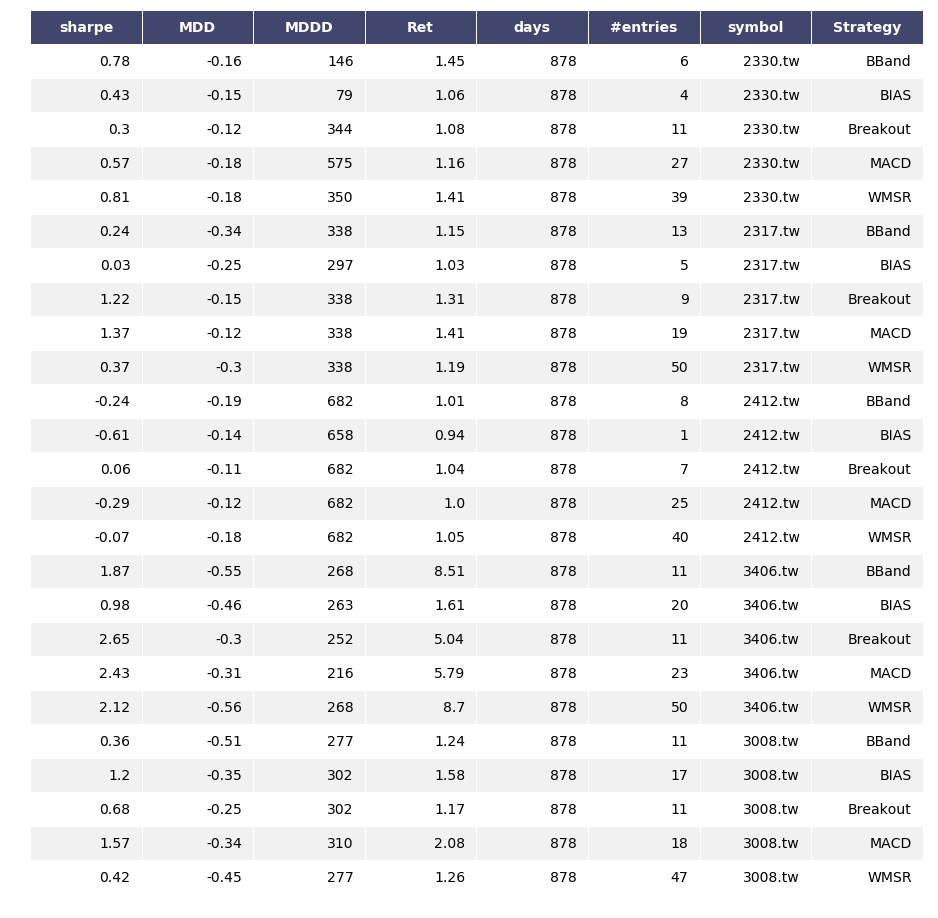

In [19]:
ax = render_mpl_table(results_df, header_columns=0, col_width=2.0)